In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import bar_chart_race as bcr
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuweizhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuweizhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nips_data = pd.read_csv('./data/nips_2016-2020.csv')
cvpr_data = pd.read_csv('./data/cvpr_16-21.csv')
icml_data = pd.read_csv('./data/icml.csv')
iclr_data = pd.read_csv('./data/ICLR-2017-18-19-21.csv')
icml_aff = pd.read_csv('./data/icml_affiliations.csv')

In [3]:
nips_data = nips_data.rename(columns={old_name: old_name.lower() for old_name in nips_data.columns})
cvpr_data = cvpr_data.rename(columns={old_name: old_name.lower() for old_name in cvpr_data.columns})
icml_data = icml_data.rename(columns={old_name: old_name.lower() for old_name in icml_data.columns})
iclr_data = iclr_data.rename(columns={old_name: old_name.lower() for old_name in iclr_data.columns})
icml_aff = icml_aff.rename(columns={old_name: old_name.lower() for old_name in icml_aff.columns})

In [4]:
nips_data.drop(columns=['paper link'], inplace=True)
cvpr_data.drop(columns=['unnamed: 0', 'citations'], inplace=True)
icml_data.drop(columns=['paper link'], inplace=True)
iclr_data.drop(columns=['paper link', 'citations', 'unnamed: 7'], inplace=True)
icml_aff.drop(columns=['paper link'], inplace=True)

In [5]:
nips_data['conference'] = ['nips']*nips_data.shape[0]
cvpr_data['conference'] = ['cvpr']*cvpr_data.shape[0]
icml_data['conference'] = ['icml']*icml_data.shape[0]
iclr_data['conference'] = ['iclr']*iclr_data.shape[0]

In [6]:
icml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        4417 non-null   int64 
 1   title       4417 non-null   object
 2   authors     4417 non-null   object
 3   abstract    4417 non-null   object
 4   conference  4417 non-null   object
dtypes: int64(1), object(4)
memory usage: 172.7+ KB


In [7]:
aff = icml_aff.affiliations.tolist()
aff_title = icml_aff.title.tolist()
aff_new = []
for i, row in icml_data.iterrows():
    if row.title in aff_title:
        aff_new.append(aff[aff_title.index(row.title)])
    else:
        aff_new.append(np.nan)
icml_data['affiliations'] = aff_new

In [8]:
icml_data.head()

,year,title,authors,abstract,conference,affiliations
0,2016,"No Oops, You Won’t Do It Again: Mechanisms for...","Nihar Shah, Dengyong Zhou",Crowdsourcing is a very popular means of obtai...,icml,NaN
1,2016,Stochastically Transitive Models for Pairwise ...,"Nihar Shah, Sivaraman Balakrishnan, Aditya Gun...",There are various parametric models for analyz...,icml,NaN
2,2016,Uprooting and Rerooting Graphical Models,Adrian Weller,We show how any binary pairwise model may be “...,icml,NaN
3,2016,A Deep Learning Approach to Unsupervised Ensem...,"Uri Shaham, Xiuyuan Cheng, Omer Dror, Ariel Ja...",We show how deep learning methods can be appli...,icml,NaN
4,2016,Revisiting Semi-Supervised Learning with Graph...,"Zhilin Yang, William Cohen, Ruslan Salakhudinov",We present a semi-supervised learning framewor...,icml,NaN


In [9]:
data = pd.concat([nips_data, cvpr_data, icml_data, iclr_data])
abstract = data.abstract.tolist()
title = data.abstract.tolist()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20698 entries, 0 to 1496
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          20698 non-null  int64 
 1   title         20698 non-null  object
 2   authors       20698 non-null  object
 3   abstract      20698 non-null  object
 4   affiliations  20197 non-null  object
 5   conference    20698 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
sw = nltk.corpus.stopwords.words('english')
sw.extend(['from', 'subject', 'using', 'via', 'new', 'work', 'different', 'introduce', 'existing', 'github', 'available', 'also', 'use', 'used', 'without', "propose", "improve",\
    "novel", "better", "extensive", "well", "eg", "however", "method", "proposed", "based", "two","one","state-of-the-art","many", "first", "present", "provide","demonstrate","ha",\
    "'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n', 'p', 'r', 'u', 'v', 'w', 'x'])

In [11]:
import string
puncs = dict.fromkeys(string.punctuation)
del puncs["-"]
table = str.maketrans(puncs)
# pre-process
lemm = nltk.WordNetLemmatizer()
abstract_proc = []
for i in range(len(abstract)):
    ab = abstract[i].strip().lower().translate(table).split()
    abstract_proc.append([lemm.lemmatize(w) for w in ab])

# Calling the overwritten count vectorizer
def dummy(doc):
    return doc

tf_vectorizer = CountVectorizer(max_df=0.3, min_df=5, stop_words=sw, decode_error='ignore', tokenizer=dummy, preprocessor=dummy)
tf = tf_vectorizer.fit_transform(abstract_proc)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-'] not in stop_words.
  warnings.warn(


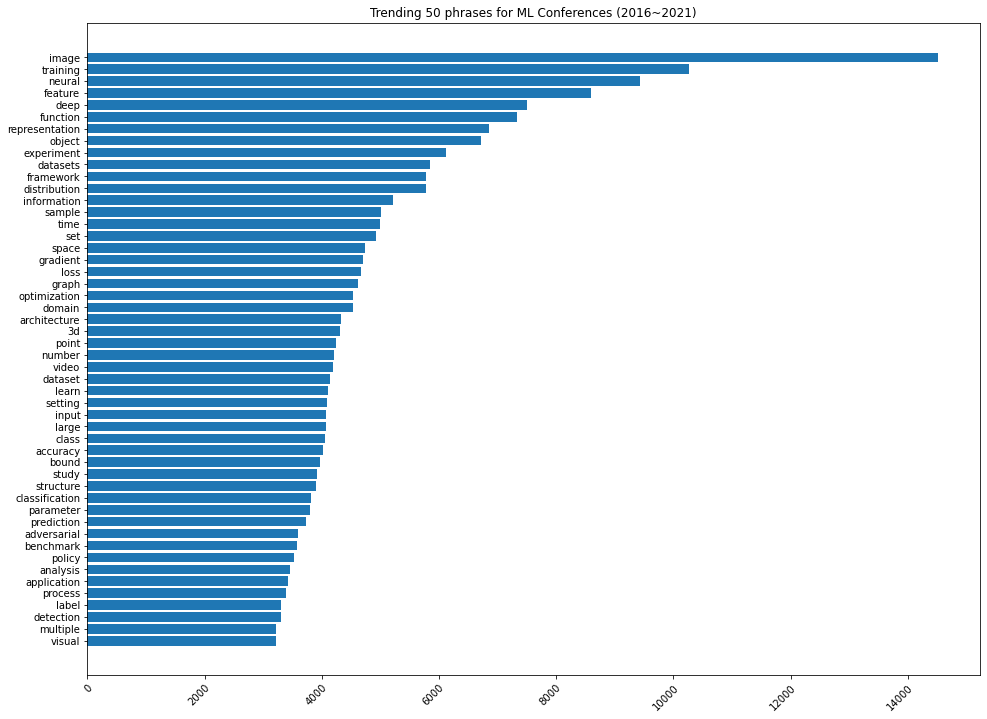

In [12]:
feature_count = pd.DataFrame({
    "feat_name": tf_vectorizer.get_feature_names_out(),
    "feat_count": tf.toarray().sum(axis=0).tolist()
})

vals_to_display = feature_count.sort_values(by='feat_count', ascending=False).head(50)

fig, ax = plt.subplots(figsize=(16, 12))

ax.barh(y=np.flip(vals_to_display.feat_name.values), width=np.flip(vals_to_display.feat_count.values))
ax.set_title("Trending 50 phrases for ML Conferences (2016~2021)")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.show()

In [14]:
diversity_papers = data.loc[:, ("title", "year")]
diversity_papers["n_themes"] = diversity_papers.index.values
diversity_papers["n_themes"] = diversity_papers["n_themes"].apply(lambda row: np.nonzero(tf[row,:])[1].tolist())

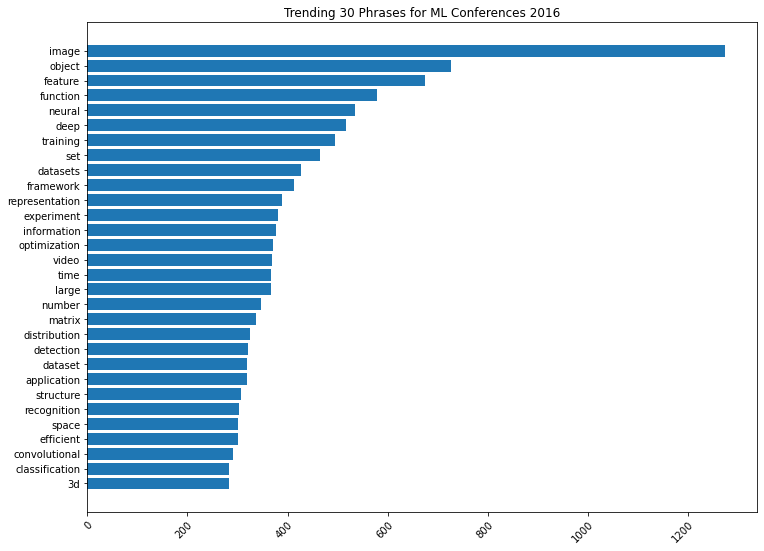

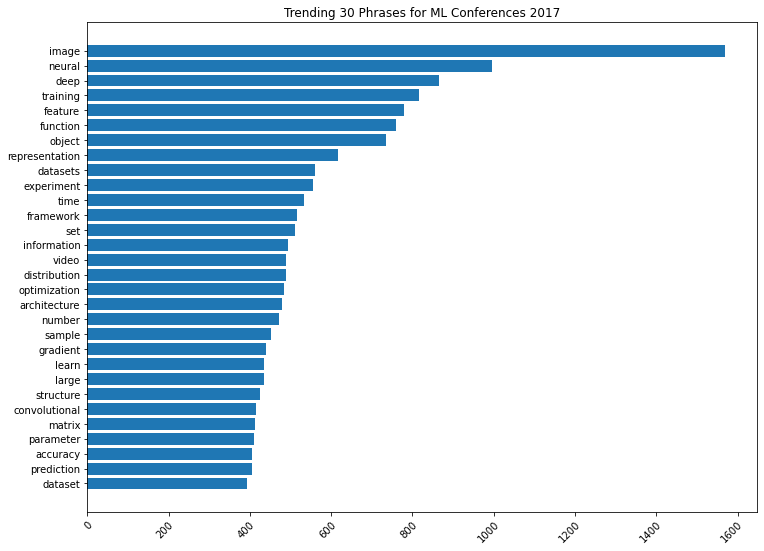

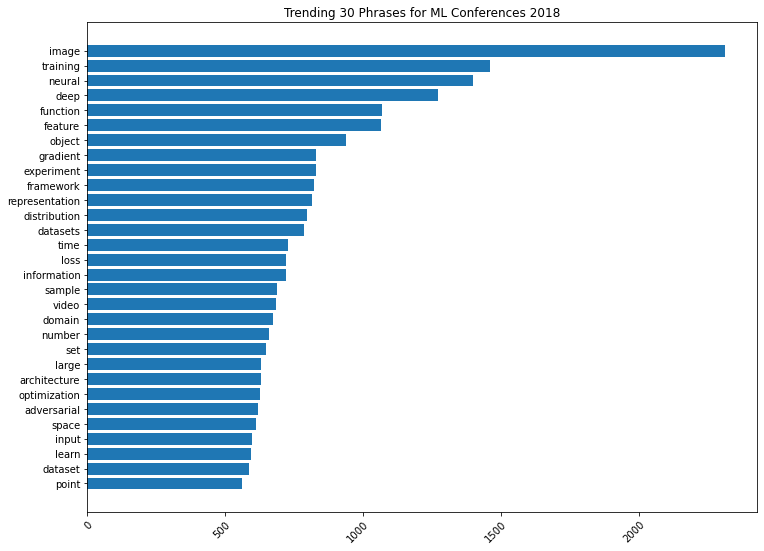

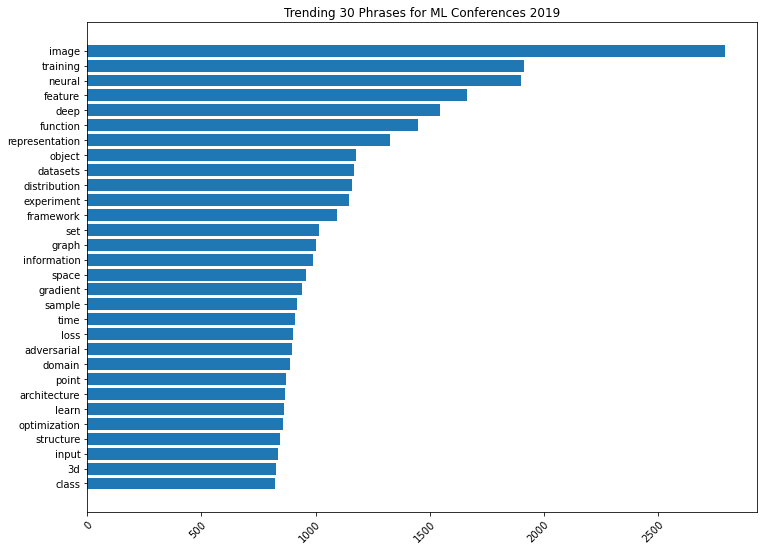

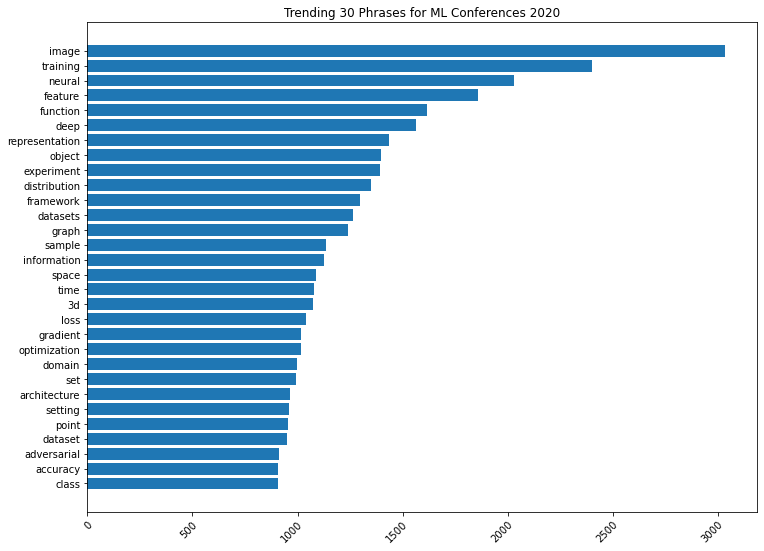

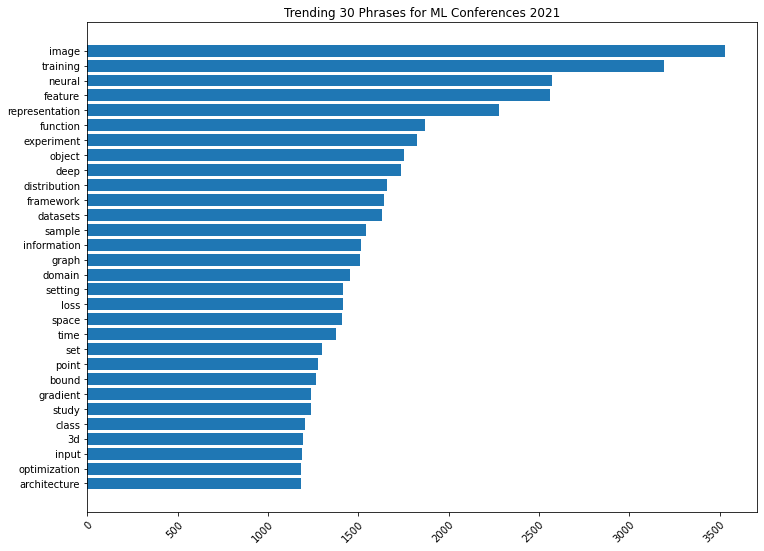

In [14]:
def get_trend_n_year(year, n):
    freq = tf.toarray()[np.where(np.array(data.year)==year)[0], :].sum(0)
    word_inds = np.flip(np.argsort(freq))[:n]
    return tf_vectorizer.get_feature_names_out()[word_inds], freq[word_inds]

top_n = 30
# fig, axes = plt.subplots(2, 3, figsize=(50, 30))
for year in range(2016, 2022):
    fig, ax = plt.subplots(figsize=(12, 9))
    names, counts = get_trend_n_year(year, top_n)
    ax.barh(y=np.flip(names), width=np.flip(counts))
    ax.set_title(f"Trending {top_n} Phrases for ML Conferences {year}")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

In [12]:
freq_year = []
for year in range(2016,2022):
    freq_year.append(tf.toarray()[np.where(np.array(data.year)==year)[0], :].sum(0))
df_freq = pd.DataFrame(freq_year, columns=tf_vectorizer.get_feature_names_out(), index=['2016','2017','2018','2019','2020','2021'])

/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


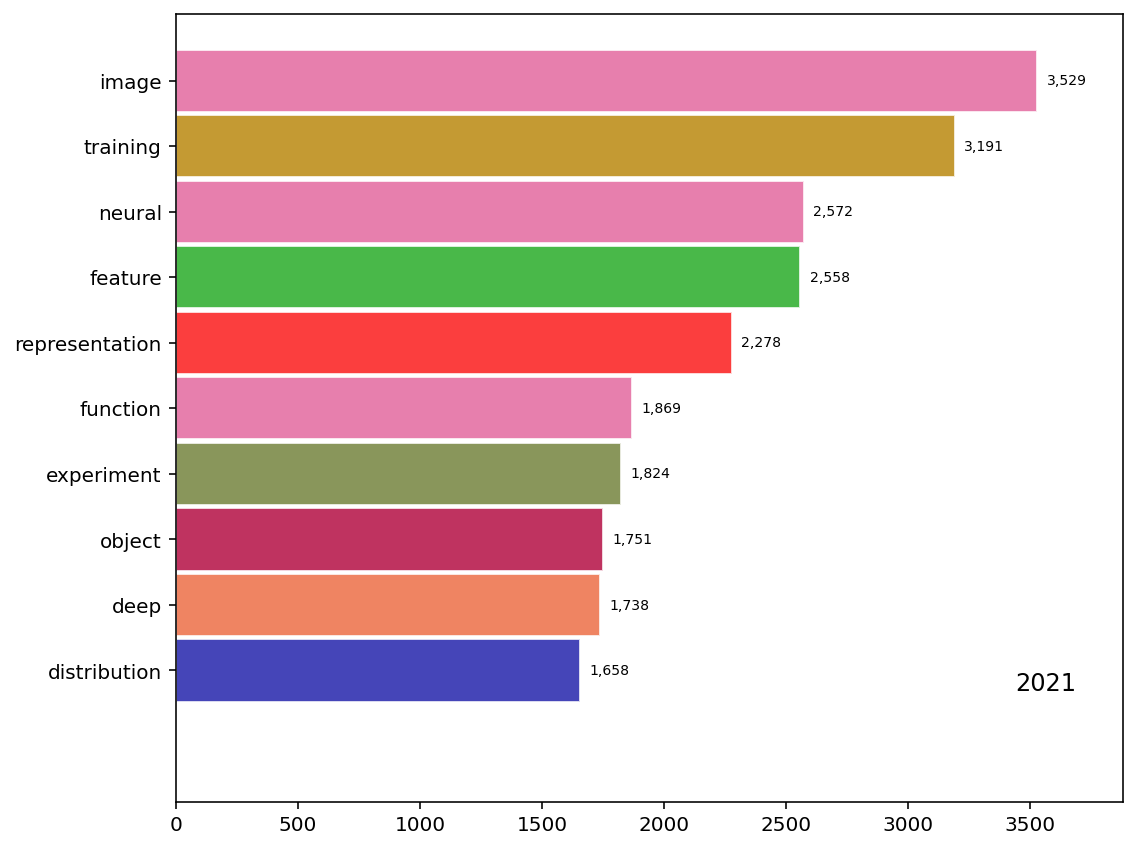

In [16]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=144, tight_layout=True)
bcr.bar_chart_race(df_freq, './trend.mp4', n_bars=10, fig=fig, figsize=(8, 6), period_length=5000, steps_per_period=50, period_fmt="{x}", tick_label_size=12)

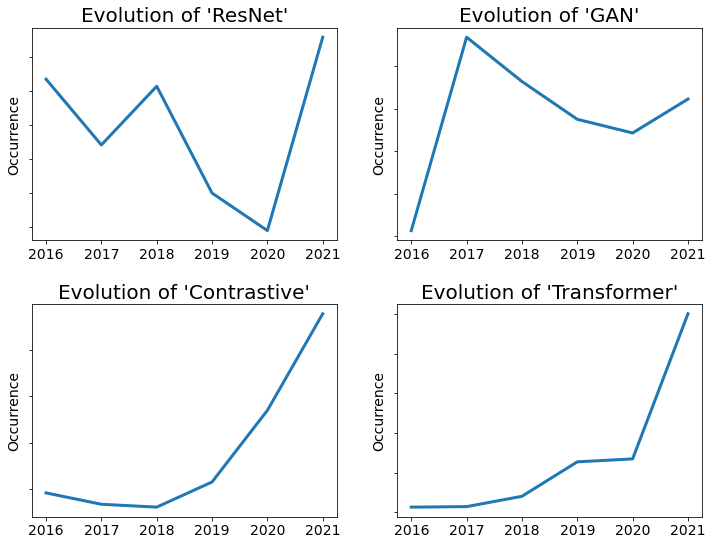

In [16]:
def trace_word_popularity(word):
    assert isinstance(word, str)
    word = word.strip().lower().translate(table)
    assert isinstance(diversity_papers, pd.DataFrame)
    is_word_in_list = np.array([feat==word for feat in tf_vectorizer.get_feature_names_out()])
    if not is_word_in_list.any():
        raise Exception("Couldn't find the word you were looking for.")
        
    if len(word.split()) > 1:
        raise Exception("Must be a 1 word long token separated by spaces.")
    
    total = diversity_papers.groupby('year').count()

    word_idx = np.argwhere(is_word_in_list).item()
    count_df = (diversity_papers.groupby('year').sum().n_themes
                .apply(lambda row: np.array(row))
                .apply(lambda row: row[row == word_idx].size).div(total.n_themes))
    return count_df

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
test_words = ["ResNet", "GAN", "Contrastive", "Transformer"]
for w, ax in zip(test_words, axes.reshape(-1)):
    counts = trace_word_popularity(w)
    counts.plot(ax=ax, linewidth=3)
    ax.set_xticks(range(2016, 2022))
    ax.tick_params(axis='x', labelsize=14)
    ax.set_yticklabels([])
    ax.set_xlabel("")
    ax.set_ylabel("Occurrence", fontsize=14)
    ax.set_title(f"Evolution of '{w}'", fontsize=20)
plt.subplots_adjust(hspace=0.3)